Now we load the model we trained in the last step. If you're using a GPU, this will start it up, which can take a moment.

In [1]:
import keras
from keras.models import model_from_json
model = model_from_json(open('model.json').read())
model.load_weights('weights.h5')
model.compile(loss='categorical_crossentropy', optimizer='adam')

Using Theano backend.
Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 75.0% of memory, CuDNN 4007)


Let's test the model by defining a function that evaluates a single image and prints a corresponding indicator.

In [2]:
import numpy as np
def print_indicator(data, model, class_names, bar_width=50):
    probabilities = model.predict(np.array([data]))[0]
    left_side = '-' * int(probabilities[1] * bar_width)
    right_side = '-' * int(probabilities[0] * bar_width)
    print class_names[0], left_side + '###' + right_side, class_names[1]

We'll test it on one image from our data set.

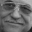

Neutral ---------###---------------------------------------- Smiling


In [3]:
from utils import show_array
X = np.load('X.npy')
class_names = ['Neutral', 'Smiling']
show_array(255 * X[2])
print_indicator(X[2], model, class_names)

Finally, we wait for video input with zmq, processing one frame every `display_rate` seconds. This should be running at the same time as the `ZMQVideoInput` app.

In [ ]:
from IPython.display import clear_output
from time import time
import zmq

bar_width = 50
display_rate = 1./10
addr = 'tcp://localhost:14000'

img_rows, img_cols = model.input_shape[1:]

context = zmq.Context()
subs = context.socket(zmq.SUB)
subs.setsockopt(zmq.SUBSCRIBE, '')
subs.connect(addr)
start = time()
previous = 0
try:
    while True:
        raw = subs.recv()
        duration = (time() - start) % display_rate
        if duration < previous:
            data = np.fromstring(raw, dtype=np.uint8).reshape(img_rows, img_cols)
#             show_array(data) # uncomment this to see the image
            data = data.astype(np.float) / 255.
            print_indicator(data, model, class_names)
            clear_output(wait=True)
        previous = duration
except KeyboardInterrupt:
    pass

Neutral --(#)----------------------------------------------- Smiling
